In [ ]:
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import ZScaleInterval
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astroquery.simbad import Simbad
import pandas as pd
import numpy as np
import os

# Directory containing the FITS files
data_directory = 'DATA OF OPEN CLUSTER/'

# Collect all filenames that end with 'e91.fits.fz'
file_list = [f for f in os.listdir(data_directory) if f.endswith('e91.fits.fz')]

# Initialize a dictionary to hold all tables
table_dict = {}

# Iterate through each e91.fits.fz file and create separate tables
for i, file_name in enumerate(file_list):
    file_path = os.path.join(data_directory, file_name)
    
    # Open the FITS file and extract the catalog
    with fits.open(file_path) as hdul:
        print(f"Processing file: {file_name}")
        
        # Extract catalog from the 3rd HDU (HDU[2]) and select flux, ra, dec columns
        catalog = Table(hdul[2].data)
        table = catalog['flux', 'ra', 'dec']
        
        # Convert the table to a pandas DataFrame and round RA/DEC to 4 decimal places
        df = table.to_pandas()
        df['ra'] = df['ra'].round(3)
        df['dec'] = df['dec'].round(3)
        
        # Store the DataFrame in the dictionary with a unique name (table1, table2, etc.)
        table_dict[f'table{i+1}'] = df




In [ ]:
table_dict

In [ ]:
from scipy.spatial import cKDTree
# Function to merge two dataframes using nearest-neighbor search with a tolerance
def merge_with_kdtree(df1, df2, tolerance=0.002):
    """
    Merge two dataframes by matching 'ra' and 'dec' using nearest-neighbor search.
    
    :param df1: First dataframe
    :param df2: Second dataframe
    :param tolerance: Maximum distance for matching 'ra' and 'dec' coordinates
    :return: Merged dataframe
    """
    # Create KDTree for the second dataframe based on 'ra' and 'dec'
    tree = cKDTree(df2[['ra', 'dec']].values)
    
    # Query KDTree for nearest neighbors within the tolerance
    distances, indices = tree.query(df1[['ra', 'dec']].values, distance_upper_bound=tolerance)
    
    # Filter out invalid matches (where distance exceeds tolerance)
    valid_matches = distances < tolerance
    
    # Get the rows from df1 and df2 that match within the tolerance
    df1_matched = df1[valid_matches].reset_index(drop=True)
    df2_matched = df2.iloc[indices[valid_matches]].reset_index(drop=True)
    
    # Merge the matched rows
    merged_df = pd.concat([df1_matched[['ra', 'dec']], df1_matched['flux'], df2_matched['flux']], axis=1)
    
    return merged_df

# Start with the first table
merged_df = table_dict['table1']

# Merge each subsequent table with the first, matching ra and dec using KDTree
for i in range(2, len(table_dict) + 1):
    table_name = f'table{i}'
    merged_df = merge_with_kdtree(merged_df, table_dict[table_name])

# Collect all the 'flux' columns from different tables
flux_columns = [col for col in merged_df.columns if 'flux' in col]

# Calculate the average flux for each coordinate
merged_df['avg_flux'] = merged_df[flux_columns].mean(axis=1)

# Keep only 'ra', 'dec', and the new 'avg_flux' columns
result_df = merged_df[['ra', 'dec', 'avg_flux']]

# Save the result to a CSV file
result_df.to_csv('averaged_flux_table.csv', index=False)

print("Averaged flux table saved to 'averaged_flux_table.csv'")

In [ ]:
# Directory containing the FITS files
data_directory2 = 'DATA OF OPEN CLUSTER/'

# Collect all filenames that end with 'e91.fits.fz'
file_list2 = [f for f in os.listdir(data_directory2) if f.endswith('e91.fits.fz')]

# Initialize a dictionary to hold all tables
table_dict2 = {}

# Iterate through each e91.fits.fz file and create separate tables
for i, file_name in enumerate(file_list2):
    file_path = os.path.join(data_directory2, file_name)
    
    # Open the FITS file and extract the catalog
    with fits.open(file_path) as hdul:
        print(f"Processing file: {file_name}")
        
        # Extract catalog from the 3rd HDU (HDU[2]) and select flux, ra, dec columns
        catalog = Table(hdul[2].data)
        table = catalog['flux', 'ra', 'dec']
        
        # Convert the table to a pandas DataFrame and round RA/DEC to 4 decimal places
        df = table.to_pandas()
        df['ra'] = df['ra'].round(3)
        df['dec'] = df['dec'].round(3)
        
        # Store the DataFrame in the dictionary with a unique name (table1, table2, etc.)
        table_dict2[f'table{i+1}'] = df

In [ ]:
table_dict2

In [ ]:
def merge_with_kdtree(df1, df2, tolerance=0.002):
    """
    Merge two dataframes by matching 'ra' and 'dec' using nearest-neighbor search.
    
    :param df1: First dataframe
    :param df2: Second dataframe
    :param tolerance: Maximum distance for matching 'ra' and 'dec' coordinates
    :return: Merged dataframe
    """
    # Create KDTree for the second dataframe based on 'ra' and 'dec'
    tree = cKDTree(df2[['ra', 'dec']].values)
    
    # Query KDTree for nearest neighbors within the tolerance
    distances, indices = tree.query(df1[['ra', 'dec']].values, distance_upper_bound=tolerance)
    
    # Filter out invalid matches (where distance exceeds tolerance)
    valid_matches = distances < tolerance
    
    # Get the rows from df1 and df2 that match within the tolerance
    df1_matched = df1[valid_matches].reset_index(drop=True)
    df2_matched = df2.iloc[indices[valid_matches]].reset_index(drop=True) # Merge the matched rows
    merged_df2 = pd.concat([df1_matched[['ra', 'dec']], df1_matched['flux'], df2_matched['flux']], axis=1)
    
    return merged_df2

# Start with the first table
merged_df2 = table_dict2['table1']

# Merge each subsequent table with the first, matching ra and dec using KDTree
for i in range(2, len(table_dict2) + 1):
    table_name = f'table{i}'
    merged_df2 = merge_with_kdtree(merged_df2, table_dict2[table_name])

# Collect all the 'flux' columns from different tables
flux_columns = [col for col in merged_df2.columns if 'flux' in col]

# Calculate the average flux for each coordinate
merged_df2['avg_flux'] = merged_df2[flux_columns].mean(axis=1)

# Keep only 'ra', 'dec', and the new 'avg_flux' columns
result_df2 = merged_df2[['ra', 'dec', 'avg_flux']]

# Save the result to a CSV file
result_df2.to_csv('averaged_V_flux_table.csv', index=False)

print("Averaged flux table saved to 'averaged_V_flux_table.csv'")

In [ ]:
from scipy.spatial import cKDTree
import pandas as pd

def merge_b_v_flux(df_b, df_v, tolerance=0.002):
    """
    Merge B and V flux tables by matching 'ra' and 'dec' using nearest-neighbor search.
    
    :param df_b: Dataframe containing B flux (result_df)
    :param df_v: Dataframe containing V flux (result_df2)
    :param tolerance: Maximum distance for matching 'ra' and 'dec' coordinates
    :return: Merged dataframe with B flux and V flux
    """
    # Create KDTree for the V flux dataframe based on 'ra' and 'dec'
    tree = cKDTree(df_v[['ra', 'dec']].values)
    
    # Query KDTree for nearest neighbors within the tolerance for the B flux dataframe
    distances, indices = tree.query(df_b[['ra', 'dec']].values, distance_upper_bound=tolerance)
    
    # Filter out invalid matches (where distance exceeds tolerance)
    valid_matches = distances < tolerance
    
    # Get the matched rows from df_b (B flux) and df_v (V flux)
    df_b_matched = df_b[valid_matches].reset_index(drop=True)
    df_v_matched = df_v.iloc[indices[valid_matches]].reset_index(drop=True)
    
    # Merge the matched rows, keeping ra, dec, and fluxes from both tables
    merged_df = pd.concat([df_b_matched[['ra', 'dec']], df_b_matched['avg_flux'].rename('B_flux'), df_v_matched['avg_flux'].rename('V_flux')], axis=1)
    
    return merged_df

# Combine B flux and V flux tables
combined_df = merge_b_v_flux(result_df, result_df2)

# Save the combined result to a CSV file
combined_df.to_csv('combined_B_V_flux_table.csv', index=False)

print("Combined B and V flux table saved to 'combined_B_V_flux_table.csv'")


In [ ]:
### Cherche les information de l'étoile sur simbad
result_table = Simbad.query_object("CD-30 19802")

ra= result_table["RA"]
dec= result_table["DEC"]
# Conversion en de ra et dec en degrees
coords = SkyCoord(ra, dec, frame='icrs', unit=(u.hourangle, u.deg))
# Recuperation
ra_deg= coords.ra.deg
dec_deg = coords.dec.deg
print(ra_deg,dec_deg)

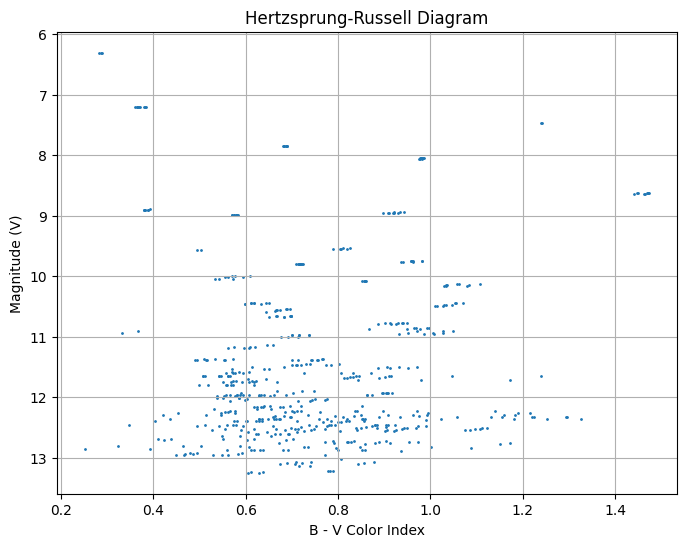

Final table saved to OPEN CLUSTER-final.csv


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.coordinates import SkyCoord
from scipy.spatial import cKDTree
from astropy import units as u

# Folder path for the FITS files
folder_path = 'DATA OF OPEN CLUSTER'

# List of B-filter and V-filter FITS files
b_fits_files = [os.path.join(folder_path, f'B-{i}.fits') for i in range(1, 4)]
v_fits_files = [os.path.join(folder_path, f'V-{i}.fits') for i in range(1, 4)]

# Function to load FITS files and extract relevant data (RA, DEC, flux)
def load_fits_data(fits_files):
    dataframes = {}
    for i, fits_file in enumerate(fits_files, start=1):
        with fits.open(fits_file) as hdul:
            data = hdul[1].data  # Assuming relevant data is in the first extension
            
            ra = np.array(data['ra'], dtype='float64')
            dec = np.array(data['dec'], dtype='float64')
            flux = np.array(data['flux'], dtype='float64')
        
        # Create DataFrame and round RA/DEC to 6 decimal places
        df = pd.DataFrame({
            'ra': np.round(ra, 6),
            'dec': np.round(dec, 6),
            'flux': flux
        })
        
        if 'B' in fits_file:
            dataframes[f'table-B-{i}'] = df
        elif 'V' in fits_file:
            df.rename(columns={'flux': 'V_flux'}, inplace=True)
            dataframes[f'table-V-{i}'] = df
            
    return dataframes

# Load data
b_dataframes = load_fits_data(b_fits_files)
v_dataframes = load_fits_data(v_fits_files)

# Combine B and V tables into a single DataFrame
combined_df = pd.DataFrame()
tolerance = 0.0002  # Adjust tolerance based on observational precision

for b_key, b_df in b_dataframes.items():
    for v_key, v_df in v_dataframes.items():
        b_coords = SkyCoord(ra=b_df['ra'].values * u.deg, dec=b_df['dec'].values * u.deg)
        v_coords = SkyCoord(ra=v_df['ra'].values * u.deg, dec=v_df['dec'].values * u.deg)

        tree = cKDTree(np.column_stack((b_coords.ra.deg, b_coords.dec.deg)))
        distances, indices = tree.query(np.column_stack((v_coords.ra.deg, v_coords.dec.deg)), distance_upper_bound=tolerance)

        valid_indices = np.isfinite(distances)
        if valid_indices.any():
            matched_b = b_df.iloc[indices[valid_indices]]
            matched_v = v_df.iloc[valid_indices]
            
            matched_data = pd.DataFrame({
                'ra': matched_b['ra'].values,
                'dec': matched_b['dec'].values,
                'B_flux': matched_b['flux'].values,
                'V_flux': matched_v['V_flux'].values
            })
            
            combined_df = pd.concat([combined_df, matched_data], ignore_index=True)

# Reference values
B_ref_mag = 12.90
V_ref_mag = 12.95
F_0_B = 1200  # Update these values based on your observations
F_0_V = 1200  # Update these values based on your observations

# Final calculations with error handling
def safe_log(value):
    return np.where(value > 0, np.log10(value), np.nan)

# Filter out extreme values
combined_df = combined_df[(combined_df['V_flux'] > 0) & (combined_df['B_flux'] > 0)]

# Calculate magnitudes
combined_df['V_mag'] = V_ref_mag + 2.5 * safe_log(F_0_V / combined_df['V_flux'])
combined_df['B_mag'] = B_ref_mag + 2.5 * safe_log(F_0_B / combined_df['B_flux'])
combined_df['B_V'] = combined_df['B_mag'] - combined_df['V_mag']

# Save the final table to a CSV file
final_output_filename = 'OPEN CLUSTER-final.csv'
combined_df.to_csv(final_output_filename, index=False)

# Create output directory for plots
output_directory = 'output_plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Plotting the HR diagram without temperature and spectral class
plt.figure(figsize=(8, 6))

# Create the scatter plot
plt.scatter(combined_df['B_V'], combined_df['V_mag'], s=1)  # Adjust the size of the points for better visibility

plt.gca().invert_yaxis()  # Invert y-axis for magnitude to have brighter stars at the bottom
plt.xlabel('B - V Color Index')
plt.ylabel('Magnitude (V)')
plt.title('Hertzsprung-Russell Diagram')

plt.grid()

# Save the plot to the output directory
output_file_path = os.path.join(output_directory, 'HR_diagram.png')
plt.savefig(output_file_path, dpi=300)

plt.show()

print(f"Final table saved to {final_output_filename}")


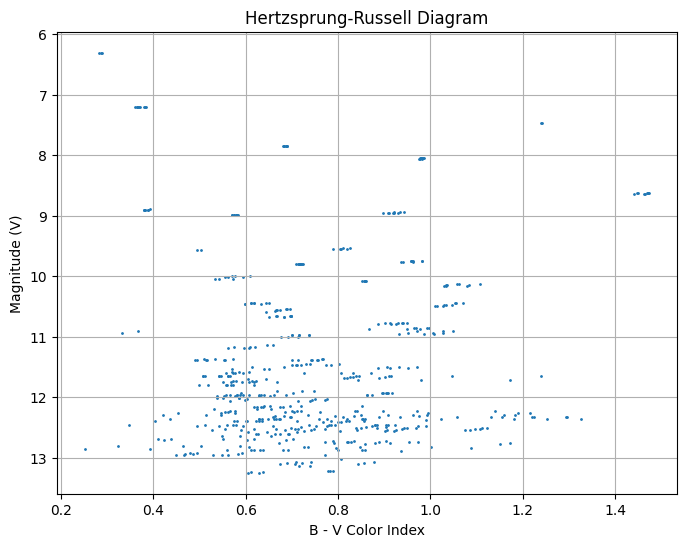

Final table saved to OPEN CLUSTER-final.csv


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.coordinates import SkyCoord
from scipy.spatial import cKDTree
from astropy import units as u

# Folder path for the FITS files
folder_path = 'DATA OF OPEN CLUSTER'

# List of B-filter and V-filter FITS files
b_fits_files = [os.path.join(folder_path, f'B-{i}.fits') for i in range(1, 4)]
v_fits_files = [os.path.join(folder_path, f'V-{i}.fits') for i in range(1, 4)]

# Function to load FITS files and extract relevant data (RA, DEC, flux)
def load_fits_data(fits_files):
    dataframes = {}
    for i, fits_file in enumerate(fits_files, start=1):
        with fits.open(fits_file) as hdul:
            data = hdul[1].data  # Assuming relevant data is in the first extension
            
            ra = np.array(data['ra'], dtype='float64')
            dec = np.array(data['dec'], dtype='float64')
            flux = np.array(data['flux'], dtype='float64')
        
        # Create DataFrame and round RA/DEC to 6 decimal places
        df = pd.DataFrame({
            'ra': np.round(ra, 6),
            'dec': np.round(dec, 6),
            'flux': flux
        })
        
        if 'B' in fits_file:
            dataframes[f'table-B-{i}'] = df
        elif 'V' in fits_file:
            df.rename(columns={'flux': 'V_flux'}, inplace=True)
            dataframes[f'table-V-{i}'] = df
            
    return dataframes

# Load data
b_dataframes = load_fits_data(b_fits_files)
v_dataframes = load_fits_data(v_fits_files)

# Combine B and V tables into a single DataFrame
combined_df = pd.DataFrame()
tolerance = 0.0002  # Adjust tolerance based on observational precision

for b_key, b_df in b_dataframes.items():
    for v_key, v_df in v_dataframes.items():
        b_coords = SkyCoord(ra=b_df['ra'].values * u.deg, dec=b_df['dec'].values * u.deg)
        v_coords = SkyCoord(ra=v_df['ra'].values * u.deg, dec=v_df['dec'].values * u.deg)

        tree = cKDTree(np.column_stack((b_coords.ra.deg, b_coords.dec.deg)))
        distances, indices = tree.query(np.column_stack((v_coords.ra.deg, v_coords.dec.deg)), distance_upper_bound=tolerance)

        valid_indices = np.isfinite(distances)
        if valid_indices.any():
            matched_b = b_df.iloc[indices[valid_indices]]
            matched_v = v_df.iloc[valid_indices]
            
            matched_data = pd.DataFrame({
                'ra': matched_b['ra'].values,
                'dec': matched_b['dec'].values,
                'B_flux': matched_b['flux'].values,
                'V_flux': matched_v['V_flux'].values
            })
            
            combined_df = pd.concat([combined_df, matched_data], ignore_index=True)

# Reference values
B_ref_mag = 12.90
V_ref_mag = 12.95
F_0_B = 1200  # Update these values based on your observations
F_0_V = 1200  # Update these values based on your observations

# Final calculations with error handling
def safe_log(value):
    return np.where(value > 0, np.log10(value), np.nan)

# Filter out extreme values
combined_df = combined_df[(combined_df['V_flux'] > 0) & (combined_df['B_flux'] > 0)]

# Calculate magnitudes
combined_df['V_mag'] = V_ref_mag + 2.5 * safe_log(F_0_V / combined_df['V_flux'])
combined_df['B_mag'] = B_ref_mag + 2.5 * safe_log(F_0_B / combined_df['B_flux'])
combined_df['B_V'] = combined_df['B_mag'] - combined_df['V_mag']

# Save the final table to a CSV file
final_output_filename = 'OPEN CLUSTER-final.csv'
combined_df.to_csv(final_output_filename, index=False)

# Create output directory for plots
output_directory = 'output_plots'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Plotting the HR diagram without temperature and spectral class
plt.figure(figsize=(8, 6))

# Create the scatter plot
plt.scatter(combined_df['B_V'], combined_df['V_mag'], s=1)  # Adjust the size of the points for better visibility

plt.gca().invert_yaxis()  # Invert y-axis for magnitude to have brighter stars at the bottom
plt.xlabel('B - V Color Index')
plt.ylabel('Magnitude (V)')
plt.title('Hertzsprung-Russell Diagram')

plt.grid()

# Save the plot to the output directory
output_file_path = os.path.join(output_directory, 'HR_diagram.png')
plt.savefig(output_file_path, dpi=300)

plt.show()

print(f"Final table saved to {final_output_filename}")

Index(['ra', 'dec', 'B_flux', 'V_flux', 'V_mag', 'B_mag', 'B_V'], dtype='object')
Percentage of each Spectral Type:
Spectral Type
G    49.131944
K    23.784722
F    21.006944
A     4.340278
M     1.736111
Name: proportion, dtype: float64


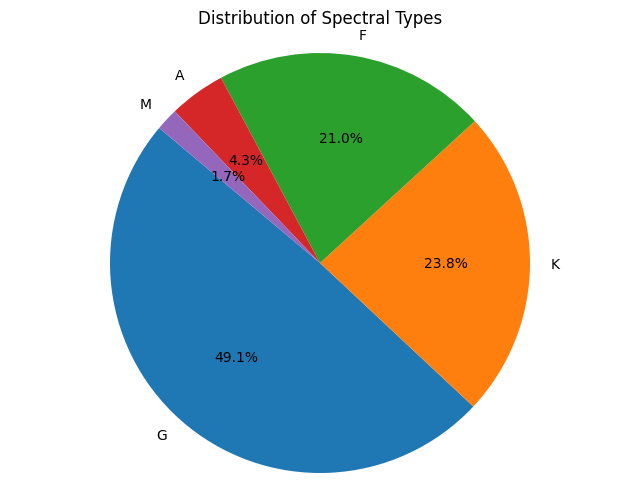

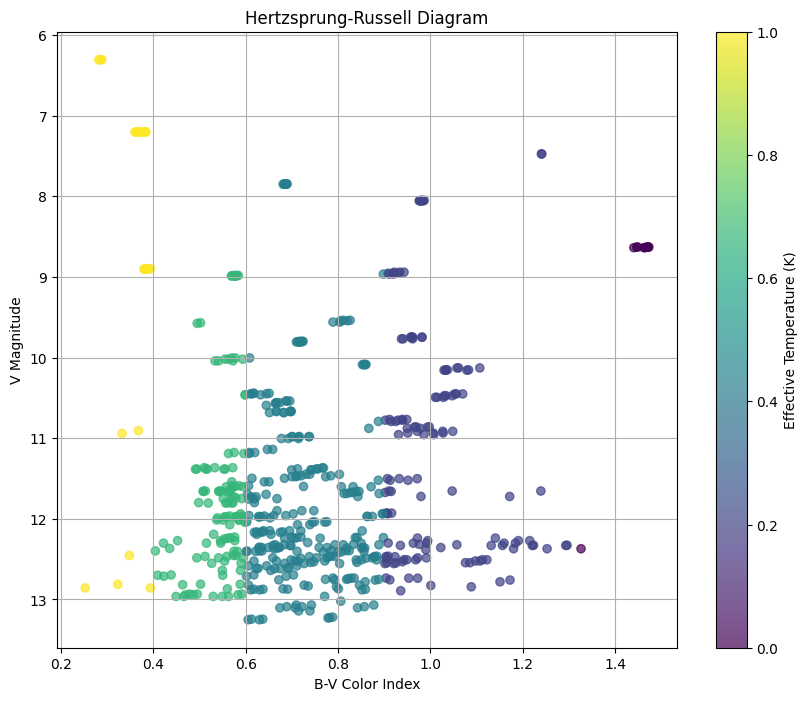


### Discussion of Stellar Properties ###

Stellar Classification:
G: 49.1%
K: 23.8%
F: 21.0%
A: 4.3%
M: 1.7%


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
data = pd.read_csv('OPEN CLUSTER-final.csv')

# Check the column names
print(data.columns)

# Define a function to classify stars based on B-V index and assign effective temperatures
def classify_star(bv_value):
    if bv_value < -0.3:
        return 'O', 30000  # O-type
    elif -0.3 <= bv_value < 0.0:
        return 'B', 20000  # B-type
    elif 0.0 <= bv_value < 0.4:
        return 'A', 10000  # A-type
    elif 0.4 <= bv_value < 0.6:
        return 'F', 7500   # F-type
    elif 0.6 <= bv_value < 0.9:
        return 'G', 5700   # G-type
    elif 0.9 <= bv_value < 1.3:
        return 'K', 4000   # K-type
    else:
        return 'M', 2500   # M-type

# Classify each star and calculate effective temperature
data['Spectral Type'], data['Effective Temperature'] = zip(*data['B_V'].apply(classify_star))

# Prepare output data
output_data = data[['ra', 'dec', 'Spectral Type', 'Effective Temperature']]

# Save output data to CSV
output_data.to_csv('HR_diagram_output.csv', index=False)

# Calculate the percentage of each spectral type
spectral_type_counts = data['Spectral Type'].value_counts(normalize=True) * 100

# Display the percentages
print("Percentage of each Spectral Type:")
print(spectral_type_counts)

# Optional: Create a pie chart for visualization
plt.figure(figsize=(8, 6))
plt.pie(spectral_type_counts, labels=spectral_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spectral Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.savefig('spectral_type_distribution.png')  # Save the pie chart
plt.show()

# Normalize effective temperatures for color mapping
norm_temp = (data['Effective Temperature'] - data['Effective Temperature'].min()) / (data['Effective Temperature'].max() - data['Effective Temperature'].min())

# Define a colormap
cmap = plt.get_cmap('viridis')  # You can choose other colormaps as well

# Map normalized temperatures to colors
colors = cmap(norm_temp)

# Plotting the HR diagram with color gradient based on effective temperature
plt.figure(figsize=(10, 8))
sc = plt.scatter(data['B_V'], data['V_mag'], color=colors, alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis for magnitudes
plt.title('Hertzsprung-Russell Diagram')
plt.xlabel('B-V Color Index')
plt.ylabel('V Magnitude')

# Create a colorbar
cbar = plt.colorbar(sc)
cbar.set_label('Effective Temperature (K)')  # Add label to colorbar

plt.grid()
plt.savefig('HR_diagram.png')  # Save the plot
plt.show()

# Discussion of Stellar Classification, Evolution, Age, and Mass/Luminosity
print("\n### Discussion of Stellar Properties ###\n")

# Stellar Classification
print("Stellar Classification:")
for spectral_type, percentage in spectral_type_counts.items():
    print(f"{spectral_type}: {percentage:.1f}%")


